<a href="https://colab.research.google.com/github/Pamgerber/Processamento_Imagens-1trabM2/blob/main/Pratica1_Opera%C3%A7%C3%B5es_Pontuais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí

Escola Politécnica

Processamento Digital de Sinais: Imagens

Professor Felipe Viel

M2- Pamela Bandeira Gerber e Ismar Pedrini

**Prática com Operações Pontuais e OpenCV**

Tutoriais da OpenCV


*   https://docs.opencv.org/master/d9/df8/tutorial_root.html
*   https://www.geeksforgeeks.org/opencv-python-tutorial/

**Conversão de imagem RGB em imagem Grayscale**

In [1]:
import cv2 #importa a biblioteca Cv2
import numpy as np #Importa a biblioteca Numpy para a utilização de matrizes
import matplotlib.pyplot as plt #Importa a biblioteca Matplotlib
#caso for usar o Google Colab com a OpenCV, usar a lib abaixo
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Abrindo a imagem
img = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png', 1)

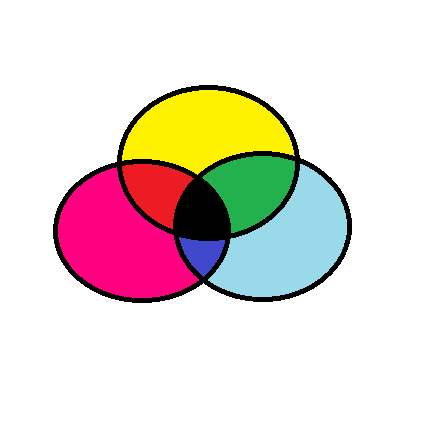

In [ ]:
# Mostrando a imagem colorida
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

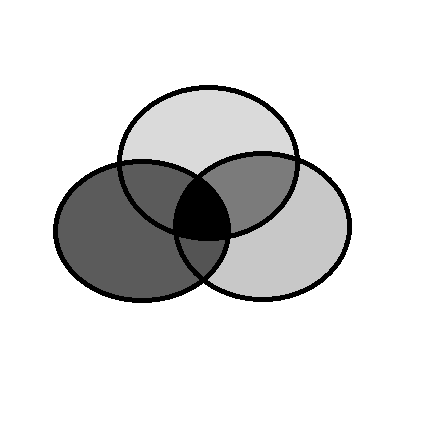

In [ ]:
# Aplicando conversão básica
# Numpy
img_grayscale_basic_np = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3

# Cv2
B, G, R = cv2.split(img) #Separa a imagem em escalas de Azul, verde e vermelho
img_grayscale_basic_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Converte o resultado para o tipo uint8
img_grayscale_basic_np = np.array(img_grayscale_basic_np, dtype=np.uint8)

# Plotagem
cv2_imshow(img_grayscale_basic_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

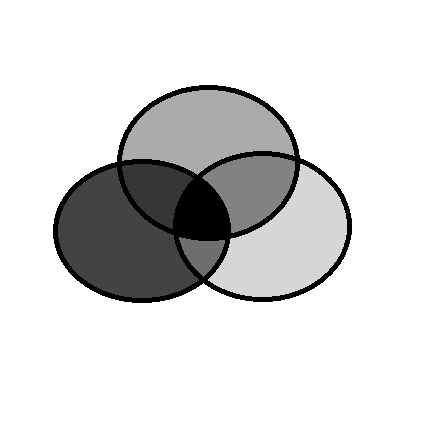

In [ ]:
# Aplicando conversão ponderada
img_grayscale_pondered_np = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]

# Cv2
B, G, R = cv2.split(img) #Separa a imagem em escalas de Azul, verde e vermelho
img_grayscale_pondered_cv2 = 0.299 * R + 0.587 * G + 0.114 * B #Define uma escala preto e branco da imagem

# Converte o resultado para o tipo uint8
img_grayscale_pondered_np = np.array(img_grayscale_pondered_np, dtype=np.uint8)

# Plotando
cv2_imshow(img_grayscale_pondered_np) #Exibe a imagem com os tons de cinza
cv2.waitKey(0)
cv2.destroyAllWindows()

**Histograma de uma imagem**

Fazer o histograma de uma imagem

In [68]:
# Calcula o histograma
histogram = np.zeros(256)

for linha in img: #itera pelas linhas
    total_pixels = 0 #conta nº total de pixels na imagem
    for pixel in linha: #itera pelos pixels em uma linha específica
        intensidade = pixel  # Nível de cinza do pixel
        histogram[intensidade] += 1  # contando a frequência de cada valor de intensidade de cinza na imagem
        total_pixels += 1

# Calcula a saída da frequência do nível de cinza 128
saida = histogram[128]

#aparece nºx vezes na imagem
print(saida)

10756.0


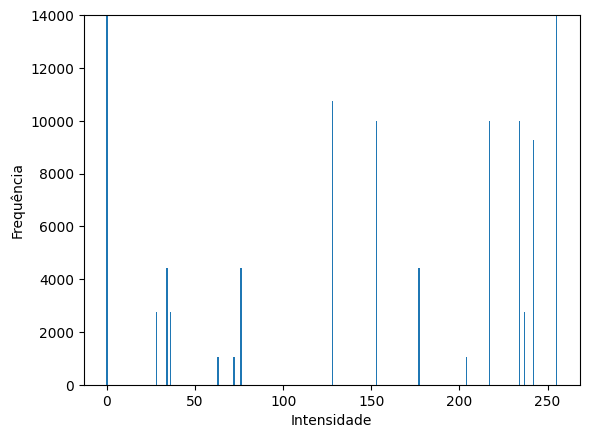

In [69]:
x = np.linspace(0, 255, 256) #Array usado p/ representar o eixo x do gráfico do histograma

# Plotando
plt.bar(x, histogram)
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.ylim(0, 14000)
plt.show()

Agora faça o histograma normalizado

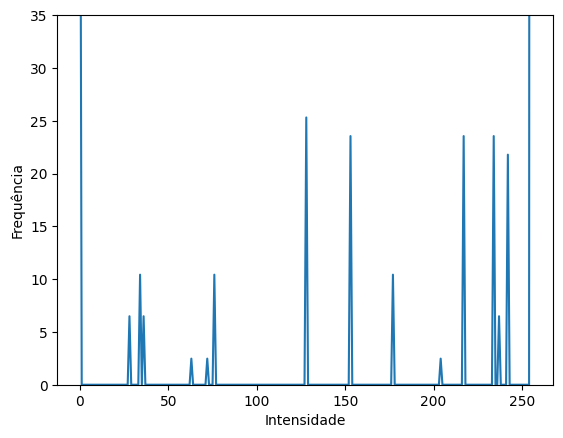

In [86]:
# Calcula o histograma normalizado
histogram_normalized = histogram / total_pixels

# Cria um vetor de valores de intensidade de 0 a 255
x = np.linspace(0, 255, 256)

# Gráfico de linha
plt.plot(x, histogram_normalized)
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.ylim(0, 35)
plt.show()

**Transformações**

Aplicar o conceito de transformação negativa em uma imagem. Cuide da questão de haver 3 bandas. [Link ref.](http://www.decom.ufop.br/guillermo/BCC326/slides/Processamento-de-Imagens-Operacoes-Pontuais.pdf)

Imagem Original


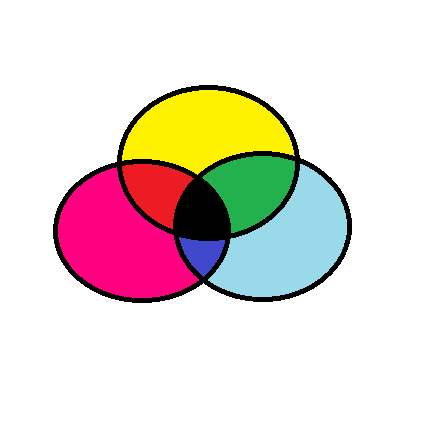

Imagem Nagativo


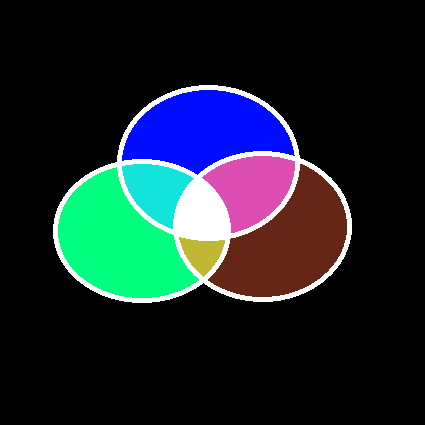

In [ ]:
#negativo

# Muda a variável colorida para 1 caso queira colorida e 0 em escala de cinza
colorida = 1

img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png', 1)

img_negative_np = 255 - img_in # Subtrai cada pixel da imagem de 255(valor máx p/ intensidade d pixel) em imagens de 8 bits(0 a 255)

# Fiz um cast
img_out = img_negative_np.astype('uint8')

print("Imagem Original")
cv2_imshow(img_in)
cv2.waitKey(0)
print("Imagem Nagativo")
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação logaritimica em uma imagem. Cuide da questão de haver 3 bandas.

Valor máximo da imagem resultante: 255
Imagem Original


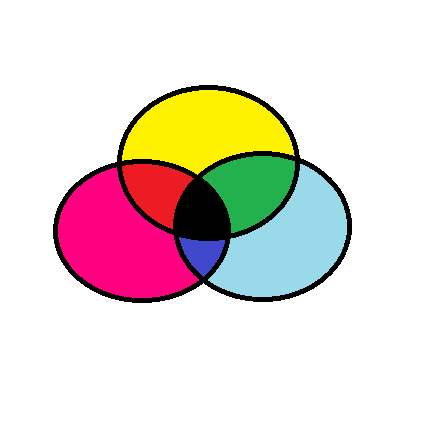

Imagem Logarítmica


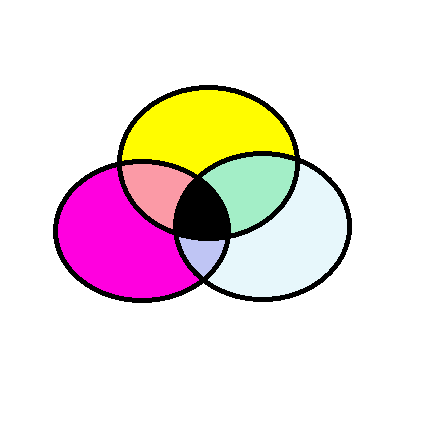

In [ ]:
#logaritimica

img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png')

c = 1

# Transformação logarítmica
img_out = c * np.log1p(img_in)

# Cast
img_out = (img_out / img_out.max() * 255).astype(np.uint8)

print("Valor máximo da imagem resultante:",img_out.max())
print("Imagem Original")
cv2_imshow(img_in)
cv2.waitKey(0)
print("Imagem Logarítmica")
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de gamma em uma imagem. Cuide da questão de haver 3 bandas.

Valor máximo da imagem resultante: 255
Original


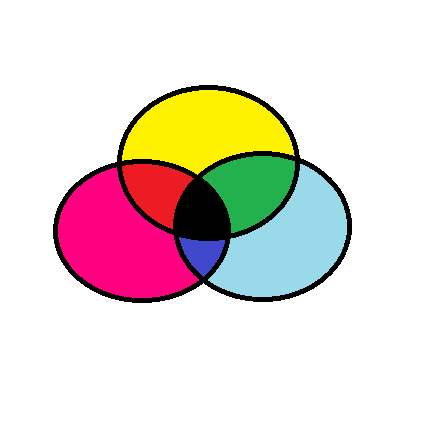

Gama


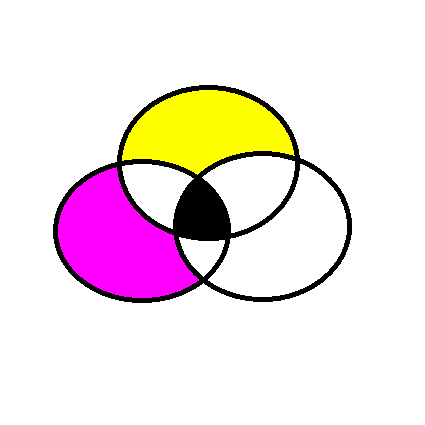

In [ ]:
img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png',1)

c = 20
gamma = 0.8

# Correção do gamma
img_out = c * (img_in ** gamma)

# Cast
img_out = np.clip(img_out, 0, 255).astype('uint8')

print("Valor máximo da imagem resultante:", img_out.max())
print("Original")
cv2_imshow(img_in)
cv2.waitKey(0)
print("Gama")
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de alargamento de contraste em uma imagem. Cuide da questão de haver 3 bandas.

Original


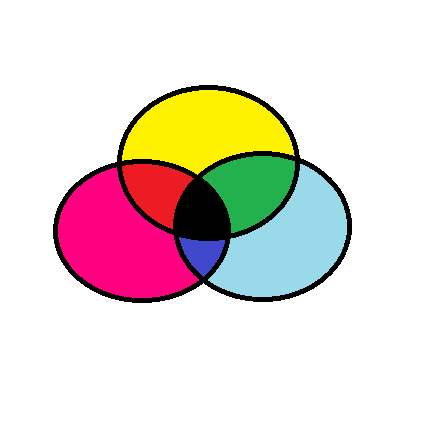

Alargamento de Contraste


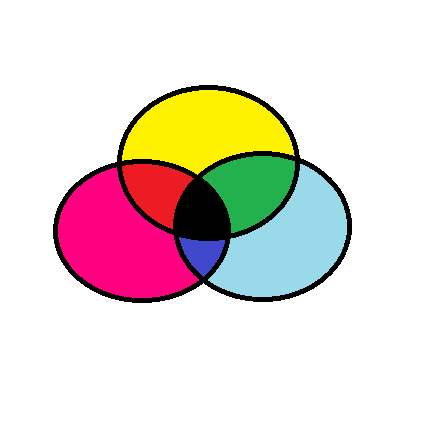

In [ ]:
#alargamento de contraste
img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png',1)

# Número de iterações
num_iterations = 3

# Loop aplica o alargamento de contraste
for i in range(num_iterations):
    # Calcula o valor mínimo e máximo das intensidades
    min_intensity = np.min(img_in)
    max_intensity = np.max(img_in)

    # Novos valores mínimo e máximo que desejo que as intensidades tenham após o alargamento
    new_min_intensity = 0
    new_max_intensity = 255

    # Transformação linear
    img_in = ((img_in - min_intensity) / (max_intensity - min_intensity)) * (new_max_intensity - new_min_intensity) + new_min_intensity

# Cast
img_out = img_in.astype('uint8')

print("Original")
cv2_imshow(img_in)
cv2.waitKey(0)
print("Alargamento de Contraste")
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de contraste e brilho em uma imagem. Cuide da questão de haver 3 bandas.
[Link ref.](http://www.decom.ufop.br/guillermo/BCC326/slides/Processamento-de-Imagens-Operacoes-Pontuais.pdf)

Original


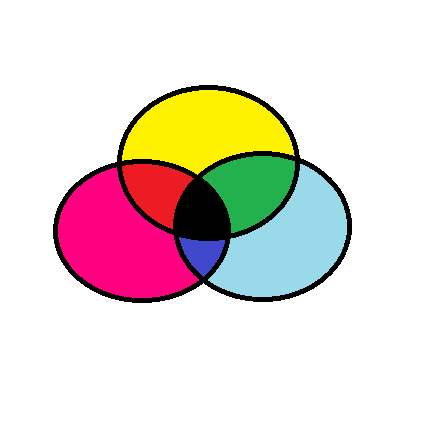

Contraste e Brilho


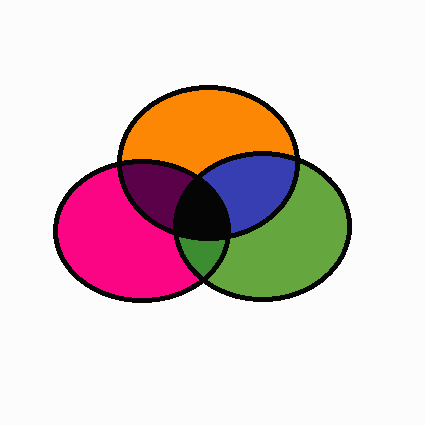

In [ ]:
#contraste e brilho

img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png',1)

a = 9
b = 5

img_out = a*img_in + b

# Cast
img_out = np.array(img_out, dtype = np.uint8)

print("Original")
cv2_imshow((img_in))
cv2.waitKey(0)
print("Contraste e Brilho")
cv2_imshow((img_out))
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de limiar em uma imagem. Cuide da questão de haver 3 bandas.

Original


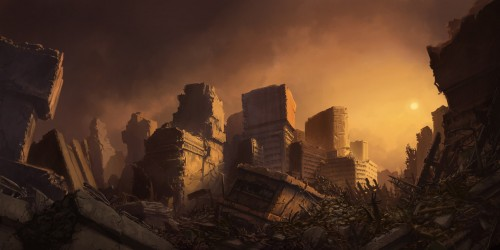

Cinza


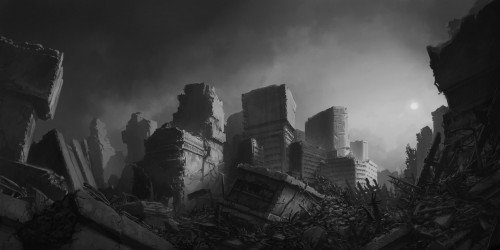

Limiarização


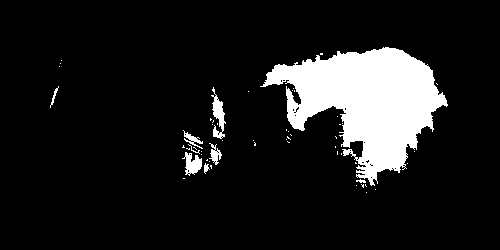

In [114]:
# Limiar
img_in = cv2.imread('/content/drive/MyDrive/Filtragem_Dominio_Frequencia/t1.jpg')

# Converte a imagem para tons de cinza
img_gray = cv2.cvtColor(img_in, cv2.COLOR_BGR2GRAY)

thresh = 127  # Valor de limiar

[fil, col] = img_gray.shape
img_out = np.zeros((fil, col), dtype=np.uint8)

for i in range(fil):
    for j in range(col):
        if img_gray[i, j] >= thresh:
            img_out[i, j] = 255
        else:
            img_out[i, j] = 0

print("Original")
cv2_imshow(img_in)
print("Cinza")
cv2_imshow(img_gray)
cv2.waitKey(0)
print("Limiarização")
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de limiar com fatiamento de plano em uma imagem. Cuide da questão de haver 3 bandas. [Link ref.](http://www.decom.ufop.br/guillermo/BCC326/slides/Processamento-de-Imagens-Operacoes-Pontuais.pdf)

Original


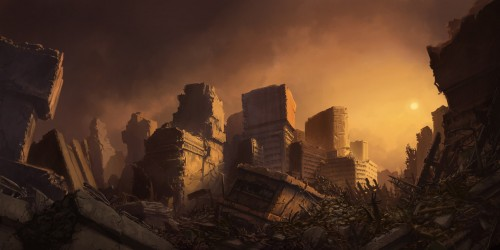

Cinza


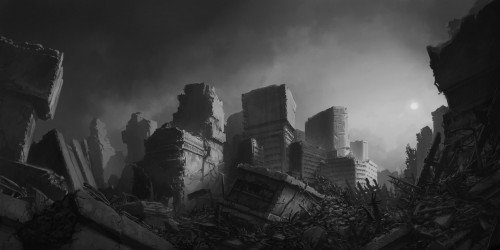

Limiarizaço com fatiamento de plano


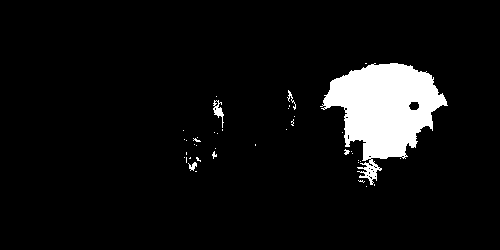

In [113]:
#limiar (com fatiamento por plano)
img_in = cv2.imread('/content/drive/MyDrive/Filtragem_Dominio_Frequencia/t1.jpg')

img_gray = cv2.cvtColor(img_in, cv2.COLOR_BGR2GRAY)

a = 150  # Limite inferior
b = 200  # Limite superior
k = 255  # Valor a ser atribuído aos pixels

# Cast
img_out = np.zeros_like(img_gray, dtype=np.uint8)

ind = np.where((img_gray > a) & (img_gray < b))
img_out[ind] = k

print("Original")
cv2_imshow(img_in)
print("Cinza")
cv2_imshow(img_gray)
print("Limiarizaço com fatiamento de plano")
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()